#### EMPEZAMOS EL PROYECTO DE MACHINE LEARNING, CON UN DATASET DEL SCRAPPING DE AIRBNB EN MADRID

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth',1000)

In [3]:
# df_c=pd.read_csv('data_NEW/calendar.csv')
# df_listings=pd.read_csv('data_NEW/listings.csv')
df_listings_detailed=pd.read_csv('data_NEW/listings_detailed.csv')

In [4]:
df_listings_detailed = df_listings_detailed.drop(columns=[
    'listing_url',
    'scrape_id',
    'last_scraped',
    'name',
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    # 'host_since',
    'host_location',
    'host_about',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_is_superhost',
    'host_thumbnail_url',
    'host_picture_url',
    'host_neighbourhood',
    'host_listings_count',
    'host_total_listings_count',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'bathrooms',
    'maximum_nights',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'calendar_updated',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'calendar_last_scraped',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'first_review',
    'last_review',
    # 'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'license',
    'instant_bookable',
    # 'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'neighborhood_overview',
    'minimum_nights',
    'neighbourhood',
    'neighbourhood_cleansed',
    'property_type'])
    

In [5]:
df_listings_detailed['price'] = df_listings_detailed['price'].apply(lambda x: (x.replace('$','')))
df_listings_detailed['price'] = df_listings_detailed['price'].apply(lambda x: float(x.replace(',','')))

In [6]:
df_listings_detailed['amenities_len']=len(df_listings_detailed['amenities'])

for i in range(len(df_listings_detailed['amenities'])):
    df_listings_detailed['amenities_len'].iloc[i] = len(df_listings_detailed['amenities'].iloc[i])

c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
df_listings_detailed.drop(df_listings_detailed[df_listings_detailed['room_type']=='Shared room'].index, inplace=True)
df_listings_detailed.drop(df_listings_detailed[df_listings_detailed['room_type']=='Hotel room'].index, inplace=True)

In [8]:
dict_room_type = {'Private room':50,
                    'Entire home/apt':200
                    # 'Shared room':20,
                    # 'Hotel room':70
                    }

df_listings_detailed['room_type_code'] = (df_listings_detailed['room_type'].replace(dict_room_type))

In [9]:
df_barrios= pd.read_excel('data_NEW/Barrios LIMPIOS.xlsx')
df_barrios.set_index('Distrito', inplace = True)

df_listings_detailed['eur_distrito'] = (df_listings_detailed['neighbourhood_group_cleansed'].replace(df_barrios['€/m2']))
df_listings_detailed['eur_distrito'] = df_listings_detailed['eur_distrito'].apply(lambda x: float(x.replace(',',''))).astype(float)

In [10]:
df_ranking= pd.read_excel('data_NEW/Barrios RANKING.xlsx')
df_ranking.set_index('Distrito', inplace = True)

df_listings_detailed['ranking'] = (df_listings_detailed['neighbourhood_group_cleansed'].replace(df_ranking['Ranking']))

In [11]:
df_dist_a_sol= pd.read_excel('data_NEW/Barrios DIST. a SOL.xlsx')
df_dist_a_sol.set_index('Distrito', inplace = True)

df_listings_detailed['dist_p_sol'] = (df_listings_detailed['neighbourhood_group_cleansed'].replace(df_dist_a_sol['Distancia a P.SOL']))

In [12]:
df_listings_detailed['bathrooms_num'] = df_listings_detailed['bathrooms_text'].str.extract(r'(\d*\.\d+|\d+.\d*)')
df_listings_detailed['bathrooms_num']= df_listings_detailed['bathrooms_num'].apply(lambda x: float(x))

df_listings_detailed['bathrooms_priv_or_shar'] = np.where((df_listings_detailed['bathrooms_text'].str.contains('shared' or 'half')),0,1)

In [13]:
df_listings_detailed['facturas_inc']= np.where((df_listings_detailed['description'].str.contains('facturas incluidas')),1,0)
df_listings_detailed['pet']= np.where((df_listings_detailed['description'].str.contains('pet friendly')),1,0)
df_listings_detailed['airport']= np.where((df_listings_detailed['description'].str.contains('airport' or 'aeropuerto' or 'barajas' or 'Barajas')),1,0)
df_listings_detailed['lux']= np.where((df_listings_detailed['description'].str.contains('lujo' or 'lux' or 'lujoso')),1,0)
df_listings_detailed['breakfast']= np.where((df_listings_detailed['description'].str.contains('breakfast' or 'desayuno')),1,0)
df_listings_detailed['wifi']= np.where((df_listings_detailed['amenities'].str.contains('"Wifi"')),1,0)
df_listings_detailed['pool']= np.where((df_listings_detailed['amenities'].str.contains('"Pool"')),1,0)
df_listings_detailed['air_cond']= np.where((df_listings_detailed['amenities'].str.contains('"Air conditioning"')),1,0)
df_listings_detailed['elevator']= np.where((df_listings_detailed['amenities'].str.contains('"Elevator"')),1,0)
df_listings_detailed['balcony']= np.where((df_listings_detailed['amenities'].str.contains('"Patio or balcony"')),1,0)
df_listings_detailed['workspace']= np.where((df_listings_detailed['amenities'].str.contains('"Dedicated workspace"')),1,0)
df_listings_detailed['nespresso']= np.where((df_listings_detailed['amenities'].str.contains('"Nespresso machine"')),1,0)
df_listings_detailed['single_level']= np.where((df_listings_detailed['amenities'].str.contains('"Single level home"')),1,0)


In [14]:
df_listings_detailed['bedrooms'].fillna(0, inplace=True)
df_listings_detailed['beds'].fillna(df_listings_detailed['beds'].median(), inplace=True)
df_listings_detailed['bathrooms_num'].fillna(1, inplace=True)
df_listings_detailed['reviews_per_month'].fillna(0, inplace=True)
df_listings_detailed['review_scores_rating'].fillna(0, inplace=True)

df_listings_detailed.rename(columns={'calculated_host_listings_count':'total_viviendas_host'}, inplace=True)

In [15]:
df_listings_detailed.drop(df_listings_detailed[df_listings_detailed['price']==0].index, inplace=True)

df_listings_detailed['price_per_month']=df_listings_detailed['price']*15
df_listings_detailed['price_per_year']=df_listings_detailed['price']*365

In [16]:
df_listings_detailed['host_since'] = df_listings_detailed['host_since'].str.extract(r'(\d*)')
df_listings_detailed['host_since'].fillna('2022', inplace=True)
df_listings_detailed['host_since'] = df_listings_detailed['host_since'].astype(int)

df_listings_detailed['host_since_years'] = 2022 - df_listings_detailed['host_since']

In [17]:
df_listings_detailed['host_since']

0        2009
1        2010
2        2010
3        2020
4        2010
         ... 
19613    2018
19614    2018
19615    2018
19616    2018
19617    2018
Name: host_since, Length: 19123, dtype: int32

In [18]:
df_listings_detailed['metros_cuadr'] =  df_listings_detailed['bathrooms_num']*2 + df_listings_detailed['beds']*20

In [19]:
df_LIMPIO = df_listings_detailed.drop(columns=['id','description','host_since','neighbourhood_group_cleansed','room_type','bathrooms_text','amenities'])

In [20]:
df_LIMPIO.to_csv('data_NEW/df_LIMPIO.csv')

In [21]:
df_LIMPIO.head()

,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,total_viviendas_host,reviews_per_month,amenities_len,room_type_code,eur_distrito,ranking,dist_p_sol,bathrooms_num,bathrooms_priv_or_shar,facturas_inc,pet,airport,lux,breakfast,wifi,pool,air_cond,elevator,balcony,workspace,nespresso,single_level,price_per_month,price_per_year,host_since_years,metros_cuadr
0,40.45724,-3.67688,2,1.0,1.0,60.0,98.0,1,0.58,272,50,4508.0,67.220486,5.8,1.0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,900.0,21900.0,13,22.0
1,40.40381,-3.74130,1,1.0,1.0,31.0,92.0,2,0.42,444,50,2287.0,47.008319,4.7,1.0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,465.0,11315.0,12,22.0
2,40.38840,-3.69511,6,3.0,5.0,50.0,0.0,7,0.00,631,200,3917.0,55.025641,1.9,2.0,1,0,0,0,1,0,1,1,0,1,1,1,0,1,750.0,18250.0,12,104.0
3,40.42183,-3.70529,3,0.0,1.0,92.0,98.0,1,0.13,460,200,4503.0,68.043894,0.8,1.0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1380.0,33580.0,2,22.0
4,40.38975,-3.69018,1,1.0,1.0,26.0,94.0,1,1.12,215,50,3917.0,55.025641,1.9,1.0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,390.0,9490.0,12,22.0


In [22]:
# plt.figure(figsize=(30,30))
# sns.pairplot(df_LIMPIO.drop(columns=['latitude','longitude','dist_p_sol','facturas_inc','pet','airport','lux','breakfast','wifi','pool','balcony','workspace','nespresso','single_level']))

In [23]:
df_LIMPIO.describe()

,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,total_viviendas_host,reviews_per_month,amenities_len,room_type_code,eur_distrito,ranking,dist_p_sol,bathrooms_num,bathrooms_priv_or_shar,facturas_inc,pet,airport,lux,breakfast,wifi,pool,air_cond,elevator,balcony,workspace,nespresso,single_level,price_per_month,price_per_year,host_since_years,metros_cuadr
count,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,19123.000000,1.912300e+04,19123.000000,19123.000000
mean,40.421052,-3.693955,3.122209,1.336715,1.934215,128.198138,64.857554,10.233436,0.812830,302.935680,138.746536,3988.674267,62.825236,3.227532,1.281206,0.721383,0.058202,0.057993,0.085499,0.074988,0.077446,0.942007,0.043299,0.615908,0.488469,0.167338,0.616221,0.023061,0.049940,1922.972076,4.679232e+04,5.582335,41.246719
std,0.022682,0.028810,1.945785,0.882220,1.408568,474.164580,43.201133,23.795570,1.249772,164.844123,73.731384,948.806911,8.848668,3.145852,0.616620,0.448331,0.234131,0.233736,0.279630,0.263379,0.267305,0.233736,0.203534,0.486393,0.499880,0.373287,0.486318,0.150102,0.217826,7112.468704,1.730701e+05,2.582668,28.692200
min,40.332210,-3.863910,1.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,2.000000,50.000000,1696.000000,37.641618,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,2.920000e+03,0.000000,0.000000
25%,40.409320,-3.707760,2.000000,1.000000,1.000000,35.000000,0.000000,1.000000,0.000000,172.000000,50.000000,3476.000000,57.198083,0.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,525.000000,1.277500e+04,3.000000,22.000000
50%,40.419690,-3.701060,2.000000,1.000000,2.000000,59.000000,91.000000,2.000000,0.230000,275.000000,200.000000,4503.000000,68.043894,2.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,885.000000,2.153500e+04,6.000000,42.000000
75%,40.430470,-3.684915,4.000000,2.000000,2.000000,100.000000,97.000000,6.000000,1.090000,411.000000,200.000000,4503.000000,68.043894,5.800000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1500.000000,3.650000e+04,7.000000,44.000000
max,40.562740,-3.531900,16.000000,15.000000,24.000000,9999.000000,100.000000,163.000000,11.670000,1311.000000,200.000000,5328.000000,74.694253,16.400000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149985.000000,3.649635e+06,13.000000,508.000000


c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


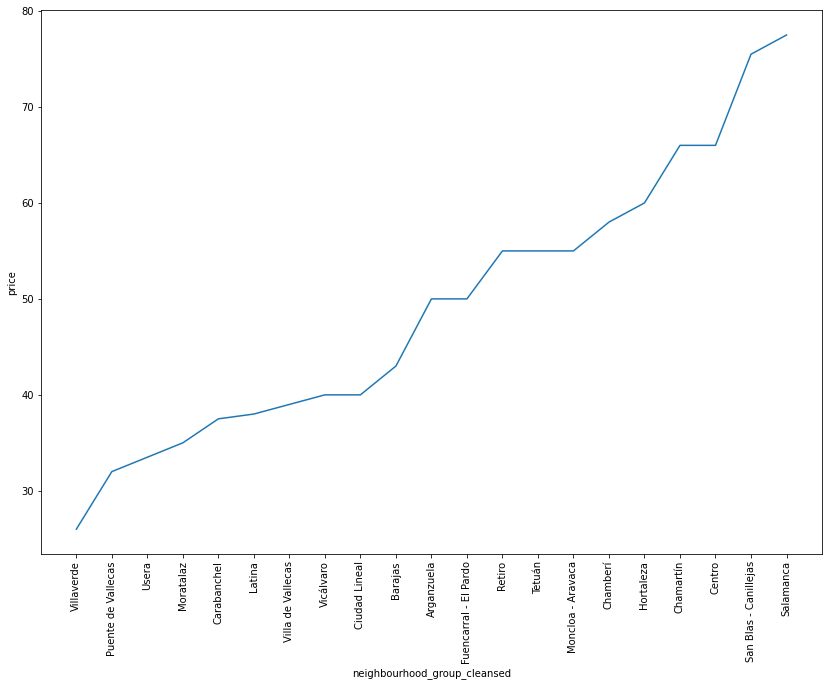

In [24]:
precio_distrito = df_listings_detailed[['neighbourhood_group_cleansed', 'price']].groupby('neighbourhood_group_cleansed', as_index=False).median()\
        .sort_values(by='price')

plt.figure(figsize=(14,10))
sns.lineplot(precio_distrito['neighbourhood_group_cleansed'], precio_distrito['price'])
plt.xticks(rotation='vertical');

In [25]:
df_LIMPIO['price'].mode()

0    50.0
dtype: float64

In [26]:
df_LIMPIO['price'].median()

59.0

In [27]:
# ELIMINAR OUTLIERS LOQUÍSIMOS ES VERY VERY IMPORTANTE
import scipy.stats as stats
from scipy.stats import mstats

comparativo = df_LIMPIO['price'].median()

df_LIMPIO.drop(df_LIMPIO[df_LIMPIO['price']>100].index, inplace=True)

# df_LIMPIO['price'] = stats.mstats.winsorize(df_LIMPIO['price'], limits=[None, 0.4])
# df_LIMPIO['price_per_month'] = stats.mstats.winsorize(df_LIMPIO['price_per_month'], limits=[None, 0.4])
# df_LIMPIO['price_per_year'] = stats.mstats.winsorize(df_LIMPIO['price_per_year'], limits=[None, 0.4])

df_LIMPIO['distrito_price_bool'] = df_LIMPIO['ranking'].map(lambda x: 0 if x <= comparativo  else 1)

# df_LIMPIO['price'] = np.log(df_LIMPIO['price'])
# df_LIMPIO['price_per_year'] = np.log(df_LIMPIO['price_per_year'])

# for i in df_LIMPIO.columns:
#     df_LIMPIO[i] = np.log(abs(df_LIMPIO[i]))

In [28]:
df_LIMPIO['price'].max()

100.0

In [29]:
df_LIMPIO

,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,total_viviendas_host,reviews_per_month,amenities_len,room_type_code,eur_distrito,ranking,dist_p_sol,bathrooms_num,bathrooms_priv_or_shar,facturas_inc,pet,airport,lux,breakfast,wifi,pool,air_cond,elevator,balcony,workspace,nespresso,single_level,price_per_month,price_per_year,host_since_years,metros_cuadr,distrito_price_bool
0,40.45724,-3.67688,2,1.0,1.0,60.0,98.0,1,0.58,272,50,4508.0,67.220486,5.8,1.0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,900.0,21900.0,13,22.0,1
1,40.40381,-3.74130,1,1.0,1.0,31.0,92.0,2,0.42,444,50,2287.0,47.008319,4.7,1.0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,465.0,11315.0,12,22.0,0
2,40.38840,-3.69511,6,3.0,5.0,50.0,0.0,7,0.00,631,200,3917.0,55.025641,1.9,2.0,1,0,0,0,1,0,1,1,0,1,1,1,0,1,750.0,18250.0,12,104.0,0
3,40.42183,-3.70529,3,0.0,1.0,92.0,98.0,1,0.13,460,200,4503.0,68.043894,0.8,1.0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1380.0,33580.0,2,22.0,1
4,40.38975,-3.69018,1,1.0,1.0,26.0,94.0,1,1.12,215,50,3917.0,55.025641,1.9,1.0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,390.0,9490.0,12,22.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,40.40756,-3.69937,1,1.0,1.0,23.0,0.0,8,0.00,229,50,4503.0,68.043894,0.8,2.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,345.0,8395.0,4,24.0,1
19614,40.43706,-3.71364,1,1.0,1.0,21.0,0.0,8,0.00,136,50,4855.0,64.056634,2.4,3.5,0,1,0,0,0,0,1,0,1,0,0,1,0,0,315.0,7665.0,4,27.0,1
19615,40.43857,-3.70715,1,1.0,1.0,22.0,0.0,8,0.00,327,50,4855.0,64.056634,2.4,3.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,330.0,8030.0,4,26.0,1
19616,40.43027,-3.66759,1,1.0,1.0,19.0,0.0,8,0.00,306,50,5328.0,74.694253,2.2,3.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,285.0,6935.0,4,26.0,1


<AxesSubplot:>

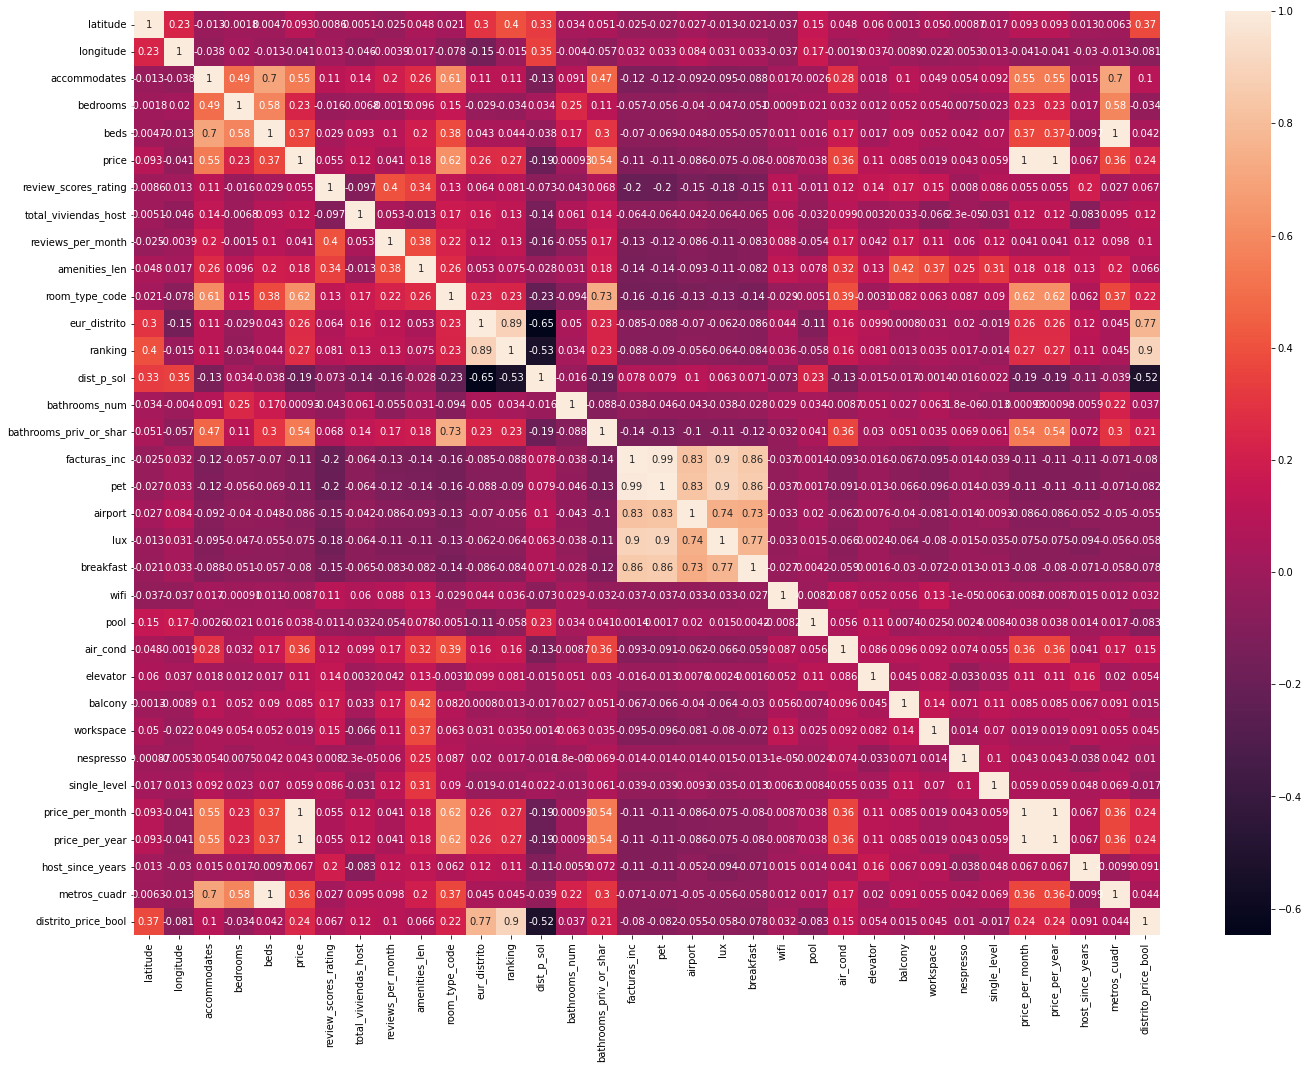

In [30]:
plt.figure(figsize=(23,17))
sns.heatmap(df_LIMPIO.corr(), annot=True)

In [31]:
X=df_LIMPIO.drop(columns=[
                        ## VARIABLES TARGET
                        'price',
                        'price_per_month',
                        'price_per_year',

                        ## VARIABLES PREDICTORAS ÚTILES
                        # 'latitude',
                        # 'longitude',
                        # 'accommodates',
                        # 'bedrooms',
                        # 'beds',
                        # 'amenities_len',
                        # 'room_type_code',
                        # 'eur_distrito',
                        # 'ranking',
                        # 'dist_p_sol',
                        # 'bathrooms_num',
                        # 'bathrooms_priv_or_shar',
                        # 'air_cond',
                        # 'elevator',

                        ## DATOS SOBRE HOST Y REVIEWS
                        # 'reviews_per_month',
                        # 'review_scores_rating',
                        # 'total_viviendas_host',
                        # 'host_since_years'
 ])

        
# y=df_LIMPIO['price_per_year']
# y=df_LIMPIO['price_per_month']
y=df_LIMPIO['price']

features = list(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.10,
                                                    random_state=42)

In [32]:
features

['latitude',
 'longitude',
 'accommodates',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'total_viviendas_host',
 'reviews_per_month',
 'amenities_len',
 'room_type_code',
 'eur_distrito',
 'ranking',
 'dist_p_sol',
 'bathrooms_num',
 'bathrooms_priv_or_shar',
 'facturas_inc',
 'pet',
 'airport',
 'lux',
 'breakfast',
 'wifi',
 'pool',
 'air_cond',
 'elevator',
 'balcony',
 'workspace',
 'nespresso',
 'single_level',
 'host_since_years',
 'metros_cuadr',
 'distrito_price_bool']

In [33]:
modelo_rf = RandomForestRegressor(
            n_estimators = 600,
            criterion    = 'squared_error',
            max_depth    = 40,
            max_features = 4,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123,
            )

            
modelo_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features=4, n_estimators=600, n_jobs=-1,
                      random_state=123)

In [34]:
predictions_rf = modelo_rf.predict(X_test)

print(modelo_rf.score(X_train, y_train))
print(modelo_rf.score(X_test, y_test))

print('MAE:', mean_absolute_error(y_test, predictions_rf))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_rf))
# print('MSE:', mean_squared_error(y_test, predictions_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_rf)))

0.9433906066753014
0.5863726504899951
MAE: 11.29531037258797
MAPE: 0.2766495782135472
RMSE: 14.939702677055365


In [35]:
y_test

4727     49.0
5072     99.0
431      70.0
15467    15.0
16440    49.0
         ... 
5218     30.0
8230     40.0
7155     64.0
5573     91.0
9779     11.0
Name: price, Length: 1463, dtype: float64

In [36]:
predictions_rf

array([43.41666667, 52.86833333, 57.03166667, ..., 52.87      ,
       68.75833333, 27.95333333])

In [37]:
y_test-predictions_rf

4727      5.583333
5072     46.131667
431      12.968333
15467   -17.226667
16440    -7.940000
           ...    
5218    -26.731667
8230     -3.976667
7155     11.130000
5573     22.241667
9779    -16.953333
Name: price, Length: 1463, dtype: float64

In [38]:
# from sklearn.model_selection import cross_val_score

# results_cv_rf = cross_val_score(modelo_rf, X, y, cv=10, scoring='neg_mean_absolute_error')

# print(results_cv_rf)
# print(results_cv_rf.mean())

In [39]:
# plt.figure(figsize=(12,6))
# sns.barplot(x=features, y=modelo_rf.feature_importances_)
# plt.xticks(rotation=90);

In [40]:
# LO EXPORTAMOS EN PICKLE PARA PRIMERA ENTREGA

# import pickle

# filename = 'modelos/Modelo_18_RF'

# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(modelo_rf, archivo_salida)

In [41]:
# with open('modelos/Modelo_18_RF', 'rb') as archivo_entrada:
#     loaded_model = pickle.load(archivo_entrada)

In [42]:
# print(loaded_model.score(X_test,y_test))

# loaded_model.predict(X_test)

In [43]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 50)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 4, 5, 7, 10]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 3, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# # print(random_grid)
# # {'bootstrap': [True, False],
# #  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# #  'max_features': ['auto', 'sqrt'],
# #  'min_samples_leaf': [1, 2, 4],
# #  'min_samples_split': [2, 5, 10],
# #  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# # Use the random grid to search for best hyperparameters
# # First create the base model to tune

# rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [44]:
# rf_random.best_params_